# <center>Proyecto 1</center>

#### ***Nombre***: Jose Eduardo Calderon Lopez
#### ***Carnet***: 14001764

<br>
<hr>
<br>

# 1. Imports necesarios para el proyecto

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# 2. Load inicial de datos

In [3]:
# Complete set
dataset = np.load('proyecto_training_data.npy')

In [4]:
filas = len(dataset)

# Training set
trainingData = dataset[:int(filas*0.8)]

# Validation set
validationData = dataset[int(filas*0.8):]

In [191]:
# Columnas de data set
saleprice = trainingData[:,0]
overallquality = trainingData[:,1]
firstfloorsqft = trainingData[:,2]
totalrooms = trainingData[:,3]
yearbuilt = trainingData[:,4]
lotfrontage = trainingData[:,5]

columnas = [saleprice, overallquality, firstfloorsqft, totalrooms, yearbuilt, lotfrontage]

# Labels de columnas de data set
colLabels = ("Sale Price","Overall Quality","First Floor sq ft","Total Rooms","Year built","Lot Frontage");

# 3. Análisis exploratorio

In [277]:
cols = 6

arrMeans = np.zeros(cols)
arrMaxValues = np.zeros(cols)
arrMinValues = np.zeros(cols)
arrStdDevs = np.zeros(cols)
arrRanges = np.zeros(cols)

for i in range(0,cols):
    arrMeans[i] = round(np.nanmean(trainingData[:,i]), 5)
    arrMaxValues[i] = round(np.nanmax(trainingData[:,i]), 5)
    arrMinValues[i] = round(np.nanmin(trainingData[:,i]), 5)
    arrStdDevs[i] = round(np.nanstd(trainingData[:,i]), 5)
arrRanges = list(map(lambda value1, value2: value1-value2, arrMaxValues, arrMinValues))

In [270]:
def printAnalysis(index):
    print(f"Media: {arrMeans[index]}")
    print(f"Valor máximo: {arrMaxValues[index]}")
    print(f"Valor mínimo: {arrMinValues[index]}")
    print(f"Rango: {arrRanges[index]}")
    print(f"Desviación estándar: {arrStdDevs[index]}")

### Sale Price ($)

In [271]:
printAnalysis(0)

Media: 180590.2774
Valor máximo: 755000.0
Valor mínimo: 34900.0
Rango: 720100.0
Desviación estándar: 78781.95108


### Overall Quality

In [272]:
printAnalysis(1)

Media: 6.10103
Valor máximo: 10.0
Valor mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.37744


### First Floor sq ft

In [273]:
printAnalysis(2)

Media: 1156.32363
Valor máximo: 3228.0
Valor mínimo: 334.0
Rango: 2894.0
Desviación estándar: 373.62033


### Total Rooms

In [274]:
printAnalysis(3)

Media: 6.48545
Valor máximo: 14.0
Valor mínimo: 2.0
Rango: 12.0
Desviación estándar: 1.60845


### Construction date

In [275]:
printAnalysis(4)

Media: 1971.4512
Valor máximo: 2010.0
Valor mínimo: 1875.0
Rango: 135.0
Desviación estándar: 29.93888


### Lot Frontage

In [276]:
printAnalysis(5)

Media: 69.94699
Valor máximo: 313.0
Valor mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.46595


# 4. Histogramas de variables

In [110]:
def drawHistogram(column, title, xlabel, ylabel, color):
    sb.set(style="darkgrid")
    sb.histplot(trainingData[:,column], color=color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Sale Price

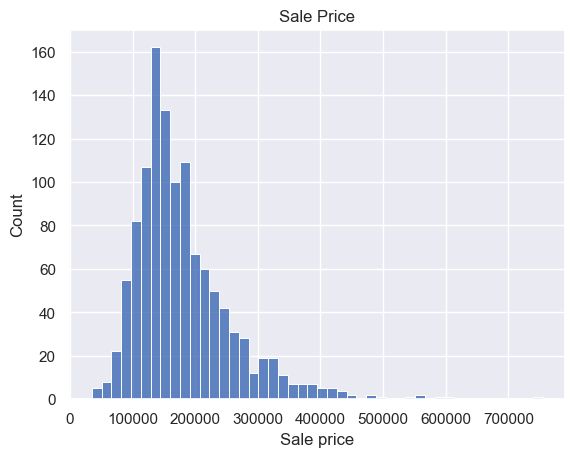

In [111]:
drawHistogram(0, "Sale Price", "SalePrice", "Count", "#3160b0")

### Overall Quality

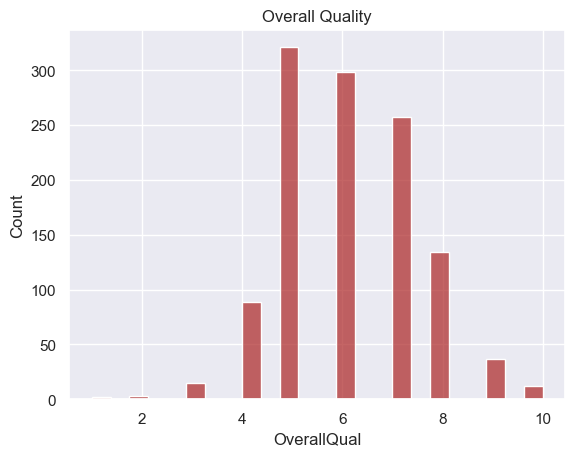

In [114]:
drawHistogram(1, "Overall Quality", "OverallQual", "Count", "#b03131")

### First Floor sq ft

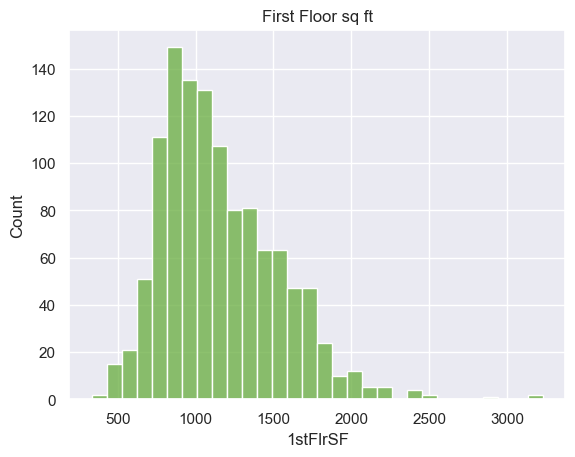

In [115]:
drawHistogram(2, "First Floor sq ft", "1stFlrSF", "Count", "#67ad3e")

### Total Rooms

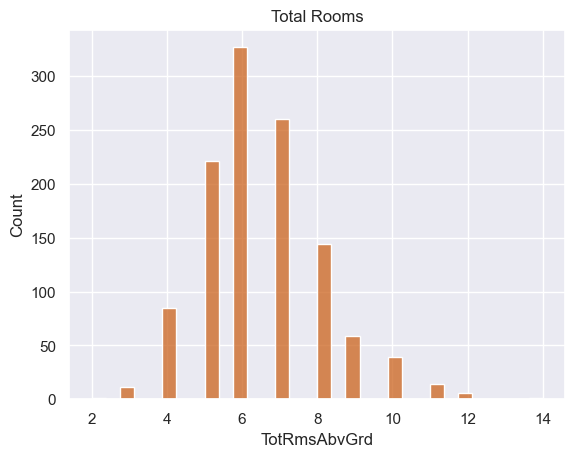

In [123]:
drawHistogram(3, "Total Rooms", "TotRmsAbvGrd", "Count", "#cc631d")

### Construction date

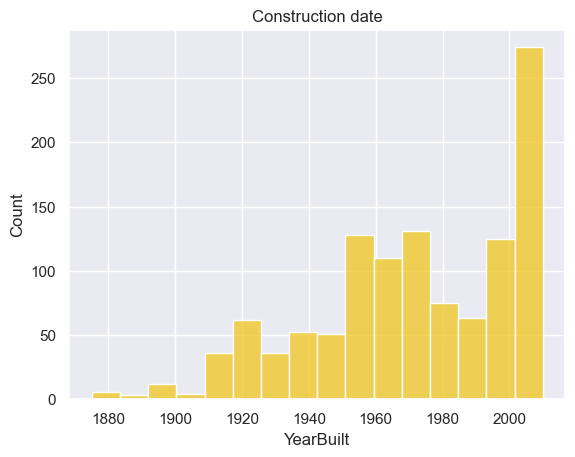

In [125]:
drawHistogram(4, "Construction date", "YearBuilt", "Count", "#f2c51f")

### Lot Frontage

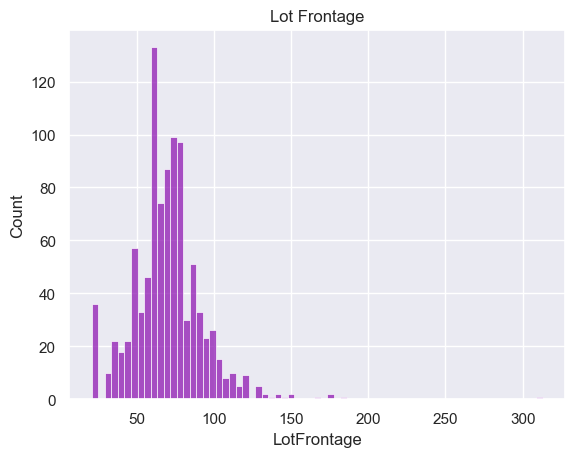

In [124]:
drawHistogram(5, "Lot Frontage", "LotFrontage", "Count", "#8f19b3")

# 5. Correlaciones

In [10]:
# Funcion que calcula el coeficiente de correlacion x vs y
def coefCorr(x,y):
    # return np.corrcoef(x,y)[0][1]
    return np.ma.corrcoef(np.ma.masked_invalid(x),np.ma.masked_invalid(y))[0][1]


# Funcion que despliega los valores de x, y, r
def printxyr(labelx, labely, r):
    print(f"x = {labelx}")
    print(f"y = {labely}")
    print(f"r = {r}\n")
    
    
# Funcion que dibuja grafica scatterplot de x vs y
def printScatterPlot(x,y, labelx, labely, r):
    
    # Informacion
    plt.title(f"{labelx} vs {labely} (r={r})")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.scatter(x,y, alpha=0.5)
    
    # Asepcto
    plt.rcParams['grid.alpha'] = 0.75
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)
    
    # Desplegar
    plt.show()
    print("\n")

    
def printCorrelations(columnaX, labelIndex):
    
    # Calculo de coeficientes de correlacion
    coeficientes = np.zeros(6)
    for i, columnaY in enumerate(columnas):
        coeficientes[i] = round(coefCorr(columnaX, columnaY), 5)    
    
    
    # Grafica de x vs y
    for i,r in enumerate(coeficientes):
        if(labelIndex != i):
            labelx = colLabels[labelIndex]
            labely = colLabels[i]
            printScatterPlot(columnaX,columnas[i],labelx,labely,r)
            # printxyr(labelx, labely, r)
    
    
    # Calcular variables con mayor correlacion (se obvia el 1)
    sortedCoeficientes = sorted(coeficientes)
    c1 = sortedCoeficientes[-2]
    c2 = sortedCoeficientes[-3]
    
    indexC1 = np.where(coeficientes == c1)[0][0]
    indexC2 = np.where(coeficientes == c2)[0][0]
    
    labelC1 = colLabels[indexC1]
    labelC2 = colLabels[indexC2]
    
    print("Variables con mayor correlación:")
    printxyr(colLabels[labelIndex], labelC1, c1)
    printxyr(colLabels[labelIndex], labelC2, c2)
    

### 5.1 Sale Price

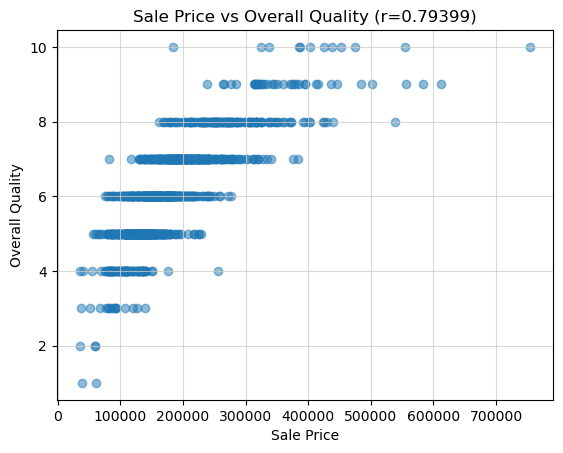

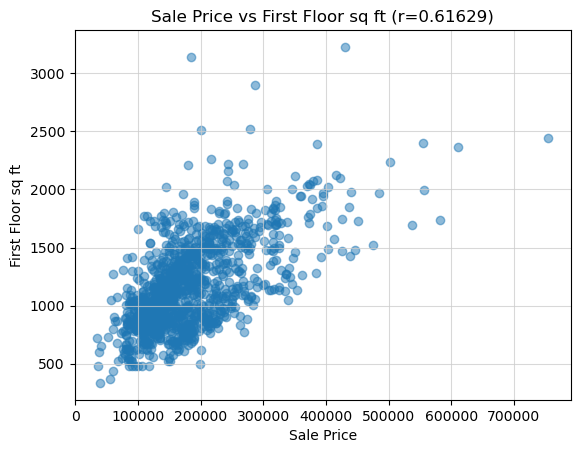

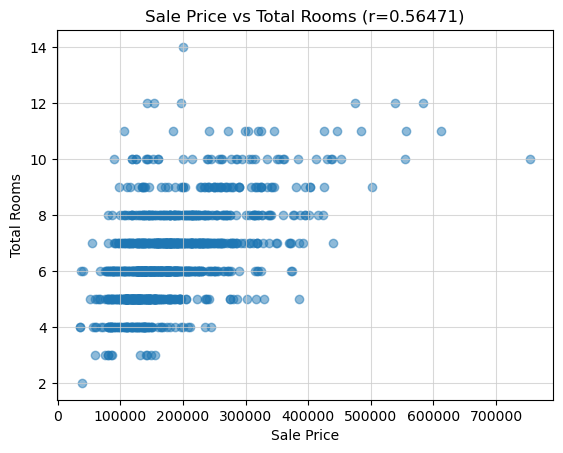

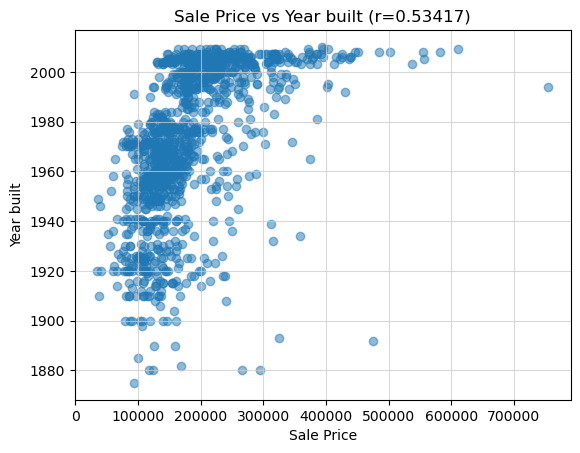

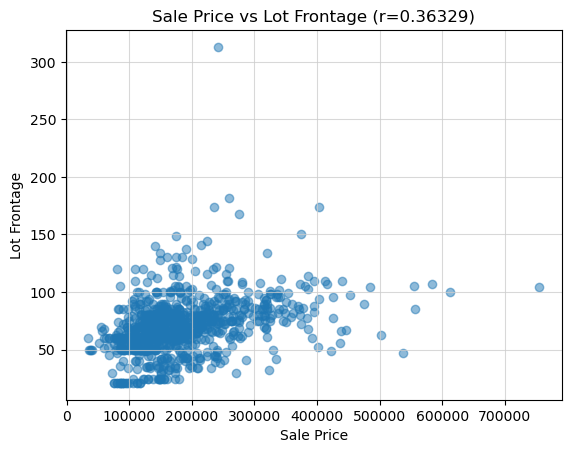



Variables con mayor correlación:
x = Sale Price
y = Overall Quality
r = 0.79399

x = Sale Price
y = First Floor sq ft
r = 0.61629



In [107]:
printCorrelations(saleprice,0)

### 5.2 Overall Quality

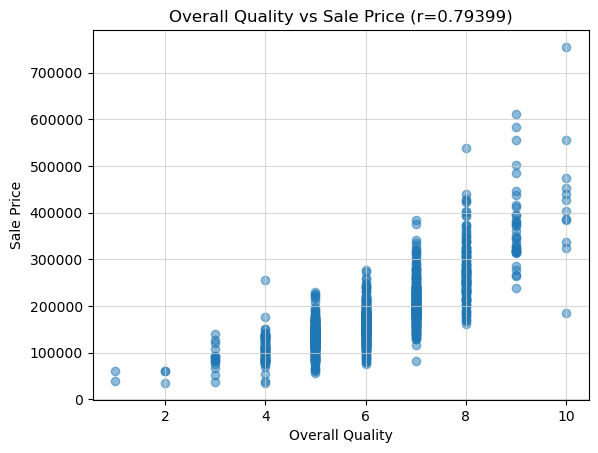

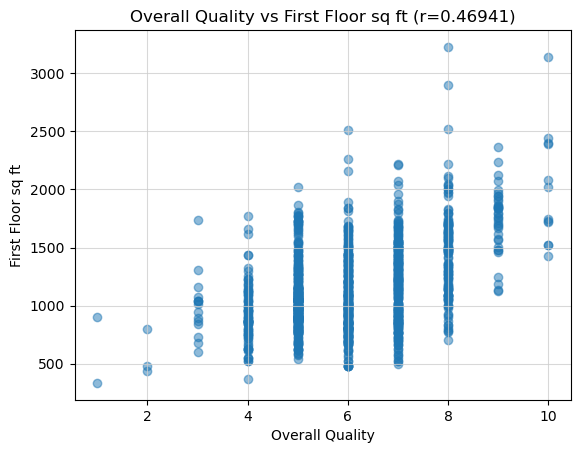

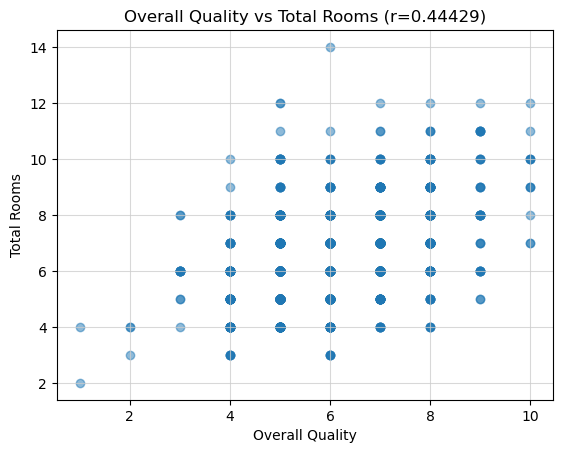

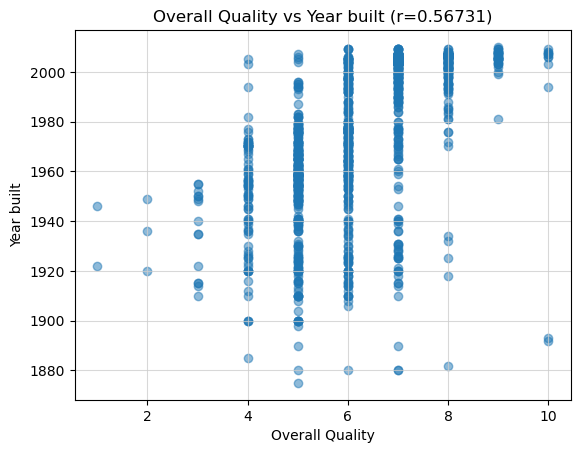

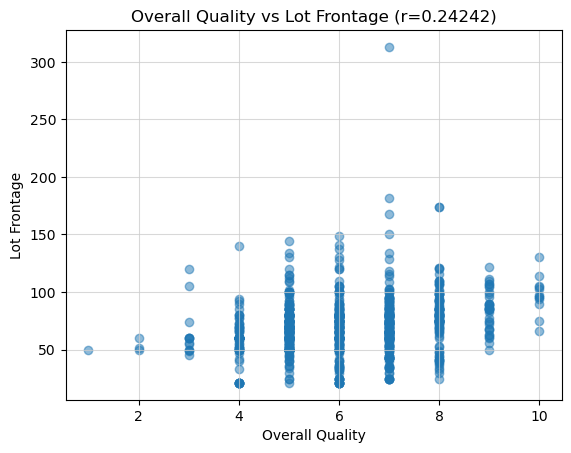



Variables con mayor correlación:
x = Overall Quality
y = Sale Price
r = 0.79399

x = Overall Quality
y = Year built
r = 0.56731



In [108]:
printCorrelations(overallquality, 1)

### 5.3 First Floor sq ft

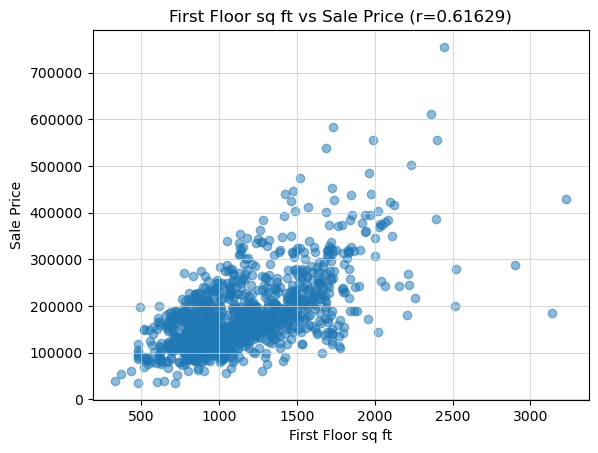

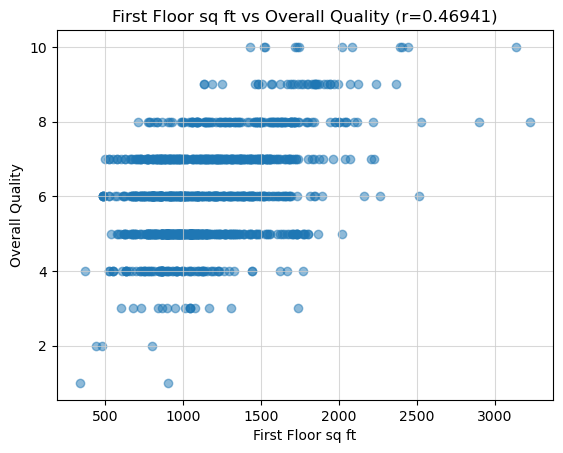

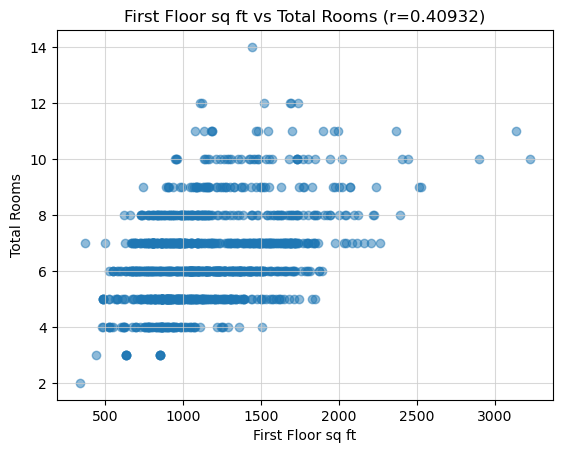

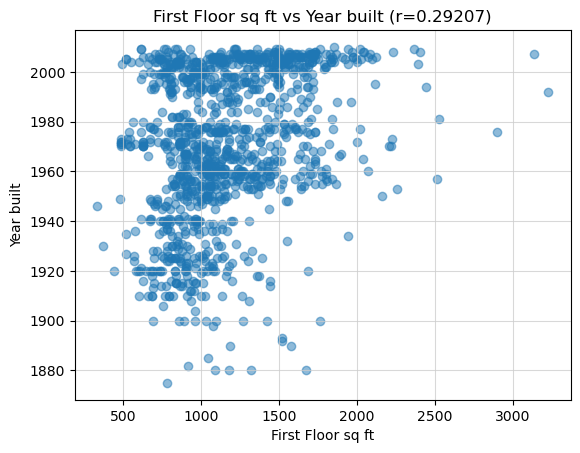

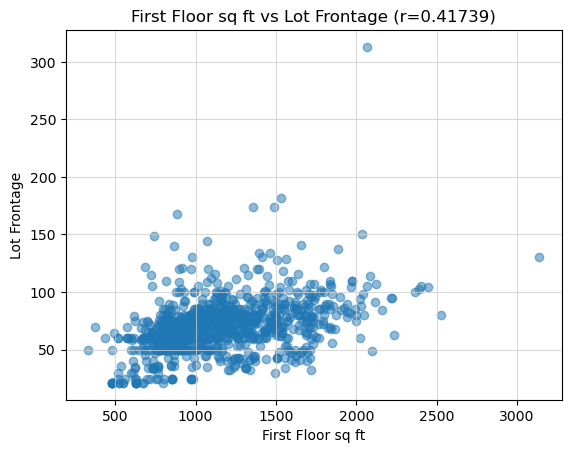



Variables con mayor correlación:
x = First Floor sq ft
y = Sale Price
r = 0.61629

x = First Floor sq ft
y = Overall Quality
r = 0.46941



In [109]:
printCorrelations(firstfloorsqft,2)

### 5.4 Total Rooms

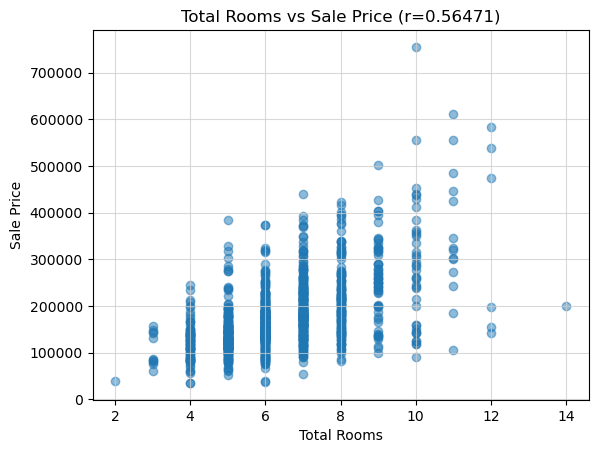

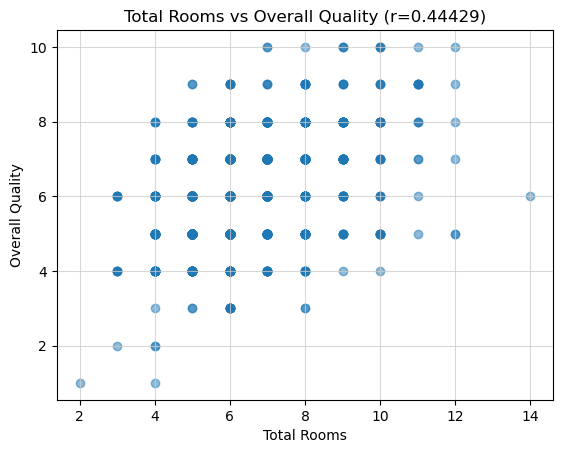

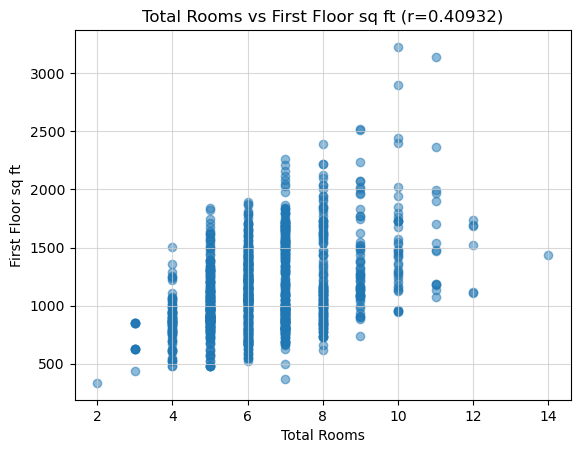

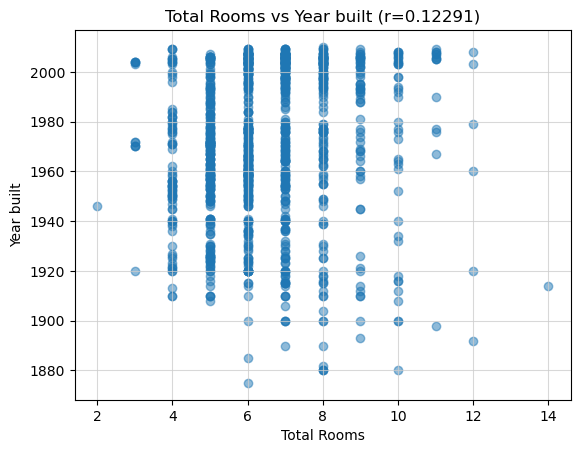

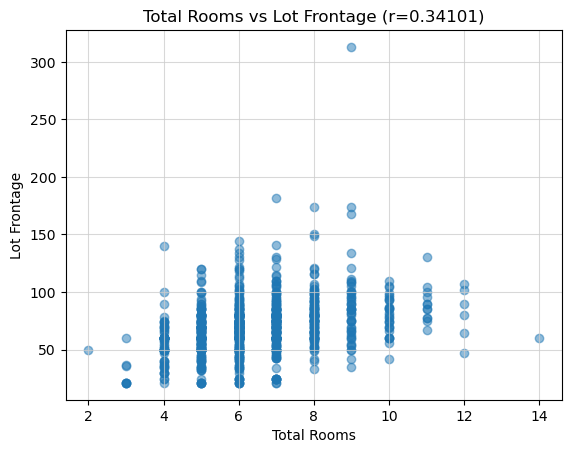



Variables con mayor correlación:
x = Total Rooms
y = Sale Price
r = 0.56471

x = Total Rooms
y = Overall Quality
r = 0.44429



In [110]:
printCorrelations(totalrooms,3)

### 5.5 Construction date

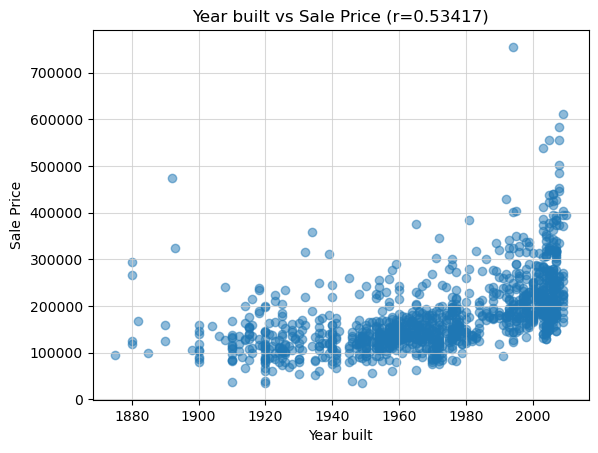

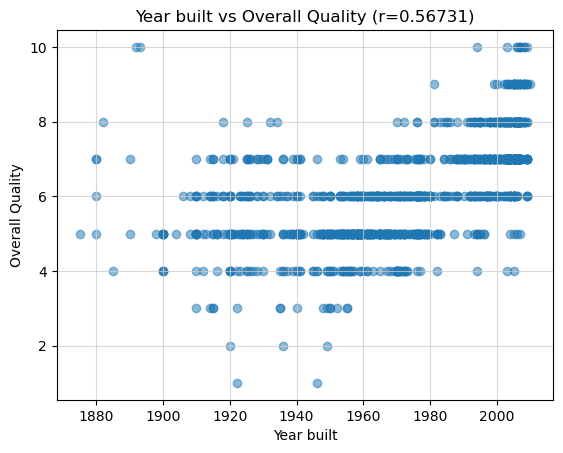

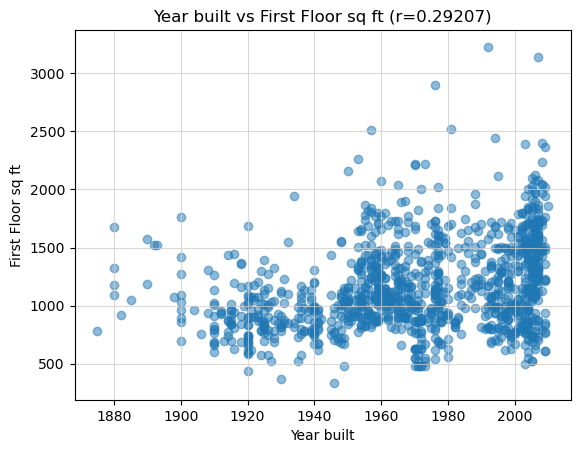

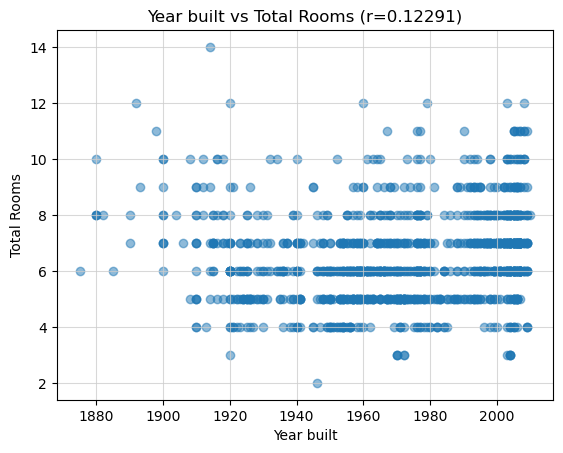

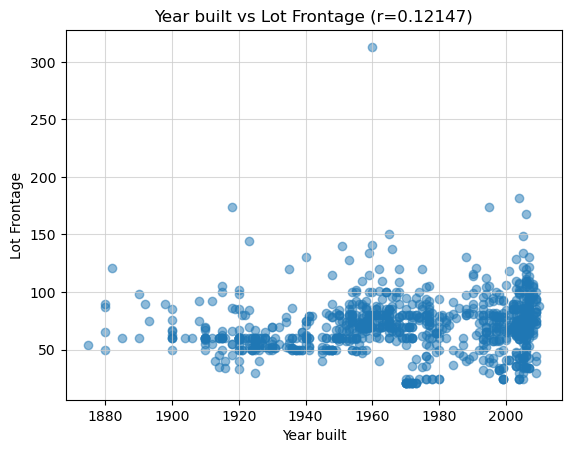



Variables con mayor correlación:
x = Year built
y = Overall Quality
r = 0.56731

x = Year built
y = Sale Price
r = 0.53417



In [111]:
printCorrelations(yearbuilt,4)

### 5.6 Lot Frontage

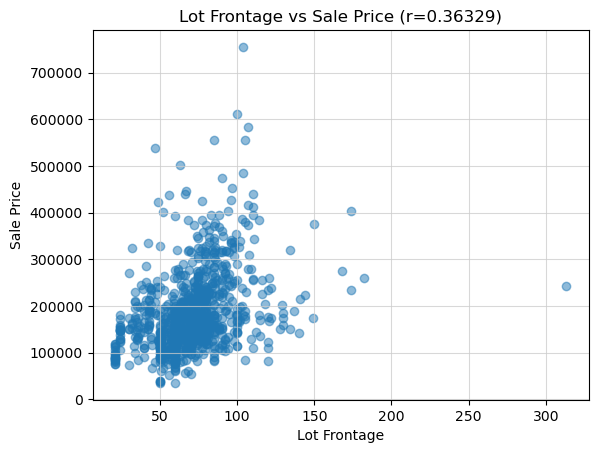

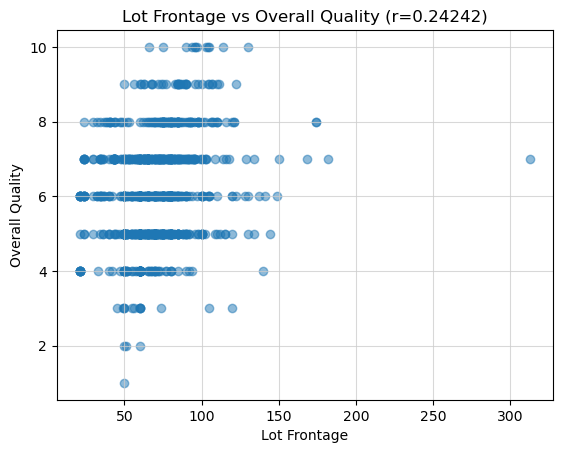

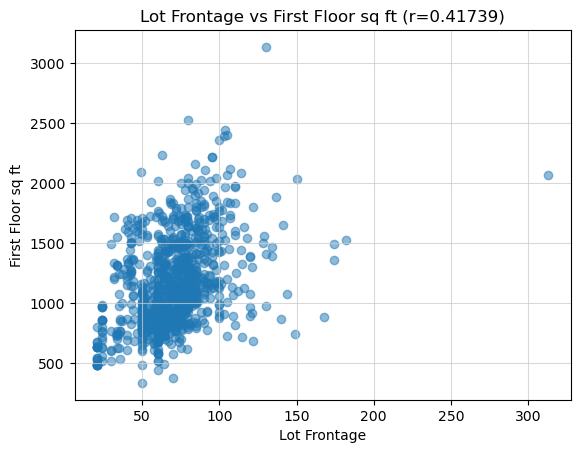

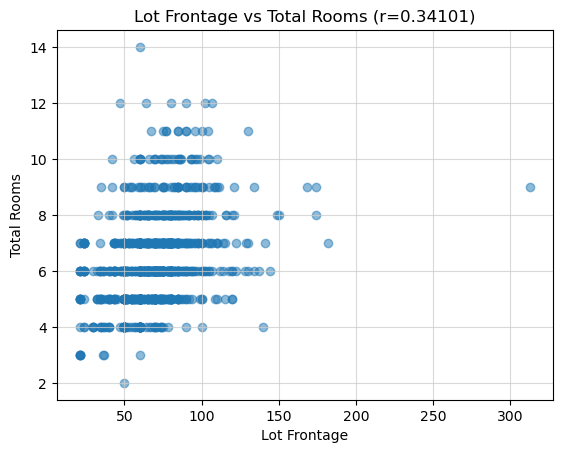

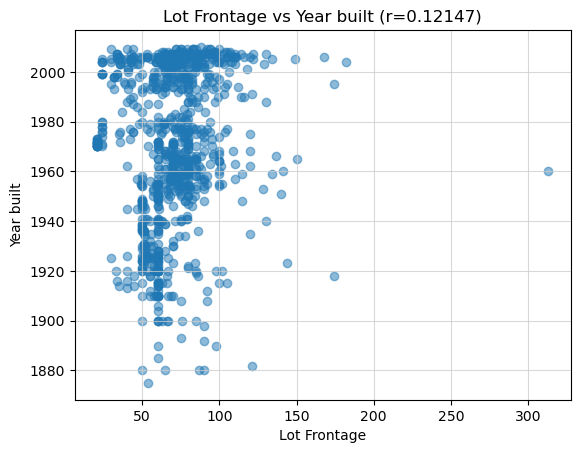



Variables con mayor correlación:
x = Lot Frontage
y = First Floor sq ft
r = 0.41739

x = Lot Frontage
y = Sale Price
r = 0.36329



In [112]:
printCorrelations(lotfrontage,5)

# 6 - 7. Modelo de Regresión Lineal

In [166]:
class ModeloRegresionLineal():

    def __init__(self):
        self.x = []
        self.y = []
        self.xlabel = "x"
        self.ylabel = "y"
        self.errores = []
        self.modelo = {}
        
    def entrenarModelo(self, vectorX, vectorY, epochs, imprimir_error_cada, alpha, xlabel="x", ylabel="y"):
        # Inicializacion de variables
        self.xlabel = xlabel
        self.ylabel = ylabel
        
        # Parametros iniciales
        parametros = np.zeros(2)
        
        # Matriz x,1
        x = np.array([vectorX, np.ones(len(vectorX))])
        x = np.transpose(x)
        
        # y (solo es para mejor organizacion y facilidad de lectura)
        y = vectorY
        self.x = x
        self.y = y
        
        # Iteracion por cada epoch
        for e in range(0,epochs):
            # prediccion y
            predY = np.dot(x, parametros)
            
            # calculo de error (y guardado)
            error = self._calcularError(y, predY)
            self.errores.append(error)
            
            # desplegar error cada cierta cantidad de iteraciones
            if((e+1)%imprimir_error_cada == 0):
                print(f"Interacion {e+1}: {error}")
            
            # calculo de gradientes
            gradientes = self._calcularGradientes(x, y, predY)
            
            # actualizar parametros
            parametros = self._calcularParametros(parametros, gradientes, alpha)
            self.modelo[e] = parametros
            
        return self.modelo, self.errores
    
    # Funcion para calcular el error
    def _calcularError(self, y, predY):
        n = len(y)
        return sum((y-predY)**2)/(2*n)
    
    # Funcion para calcular gradientes
    def _calcularGradientes(self, x, y, predY):
        n = len(y)
        return np.dot((predY-y),x)/n
    
    # Funcion para caluclar parametros
    def _calcularParametros(self, parametros, gradientes, alpha):
        return parametros-(alpha*gradientes)
    
    # Plot de error en el tiempo
    def plotCurvaAprendizaje(self):
        plt.title("Curva de aprendizaje")
        plt.xlabel("Iteracion")
        plt.ylabel("Error")
        plt.plot(range(0,len(self.errores)), self.errores)
        plt.show()
        
    # Plot de evoluion de modelo
    def plotModelo(self, n):
        parametros = np.array([value for value in self.modelo.values()])
        
        newY = []
        newX = [fila[0] for fila in self.x]
        for i in range(0,len(parametros)):
            if(i%n == 0):
                newY = np.dot(self.x, parametros[i])
                plt.plot(newX, newY, label=f"Iteración {i}")
        
        plt.title("Evolución de modelo")
        plt.scatter(newX,newY, label="Resultado")
        plt.scatter(newX,self.y, label="Original")
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.show()    


Interacion 10: 9.357124560193238
Interacion 20: 4.1986350372070484
Interacion 30: 1.8846023977985422
Interacion 40: 0.8465542014547595
Interacion 50: 0.38089518069639716
Interacion 60: 0.17200212933535092
Interacion 70: 0.07829079727566375
Interacion 80: 0.036248427860664525
Interacion 90: 0.017384067739872788
Interacion 100: 0.008917065144092618
Interacion 110: 0.005114194549539262
Interacion 120: 0.0034036093805372277


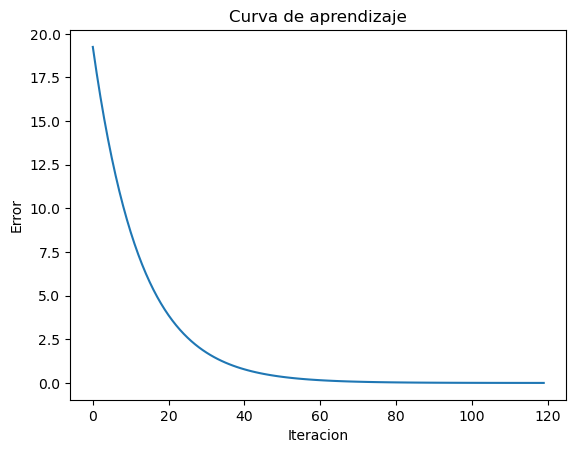

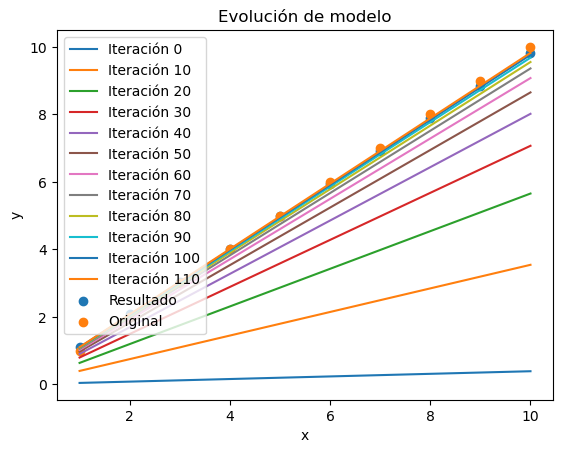

In [7]:
# Ejemplo de uso
x = np.arange(1, 11, 1)
y = np.arange(1, 11, 1)
e = 120
error = 10
alpha = 0.001

modelo = ModeloRegresionLineal()
parametros, errores = modelo.entrenarModelo(x,y,e,error,alpha)
modelo.plotCurvaAprendizaje()
modelo.plotModelo(10)

In [ ]:
# saleprice = trainingData[:,0]
# overallquality = trainingData[:,1]
# firstfloorsqft = trainingData[:,2]
# totalrooms = trainingData[:,3]
# yearbuilt = trainingData[:,4]
# lotfrontage = trainingData[:,5]

## 7.1 Entrenar modelos seleccionados

### 7.1.1 Sale Price vs Overall Quality

Interacion 500: 13.720775679344086
Interacion 1000: 9.750912071197234
Interacion 1500: 7.058434148556649
Interacion 2000: 5.2323166595248765
Interacion 2500: 3.9937902241891554
Interacion 3000: 3.1537852736648717
Interacion 3500: 2.5840692815195108
Interacion 4000: 2.1976711876705064
Interacion 4500: 1.935604668582612
Interacion 5000: 1.7578634697511601
Interacion 5500: 1.6373141761136434
Interacion 6000: 1.5555541098370835
Interacion 6500: 1.500102035122584
Interacion 7000: 1.4624928118159977
Interacion 7500: 1.4369851336088832
Interacion 8000: 1.419685078188434
Interacion 8500: 1.4079516732456214
Interacion 9000: 1.3999937339090682
Interacion 9500: 1.394596426069189
Interacion 10000: 1.3909358136056185


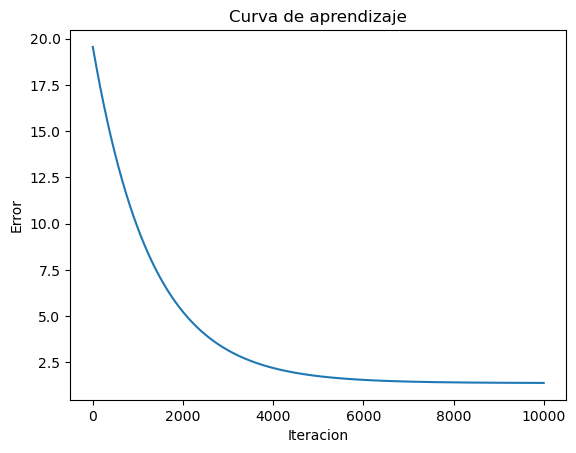

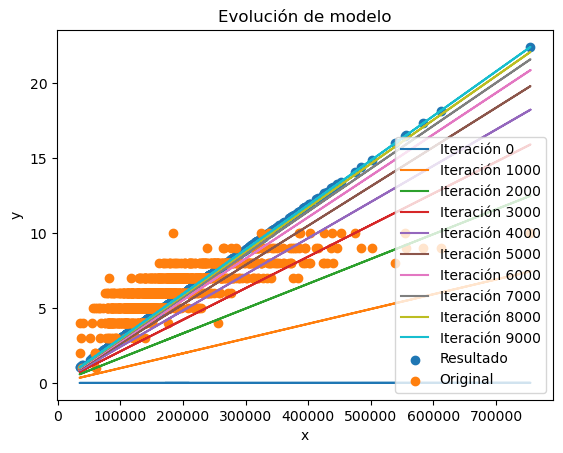

In [42]:
e = 10000
error = 500
alpha = 0.00000000000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(saleprice,overallquality,e,error,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(1000)

### 7.1.2 Sale Price vs First Floor sq ft

Interacion 5000: 524917.640261168
Interacion 10000: 380124.76750611677
Interacion 15000: 281915.3333657804
Interacion 20000: 215302.2966144326
Interacion 25000: 170120.31685782
Interacion 30000: 139474.49444399646
Interacion 35000: 118688.18900809217
Interacion 40000: 104589.35074425135
Interacion 45000: 95026.45651068982
Interacion 50000: 88540.18122963456
Interacion 55000: 84140.70069642551
Interacion 60000: 81156.64156796972
Interacion 65000: 79132.62786568524
Interacion 70000: 77759.78929556989
Interacion 75000: 76828.62675577088
Interacion 80000: 76197.04217298975


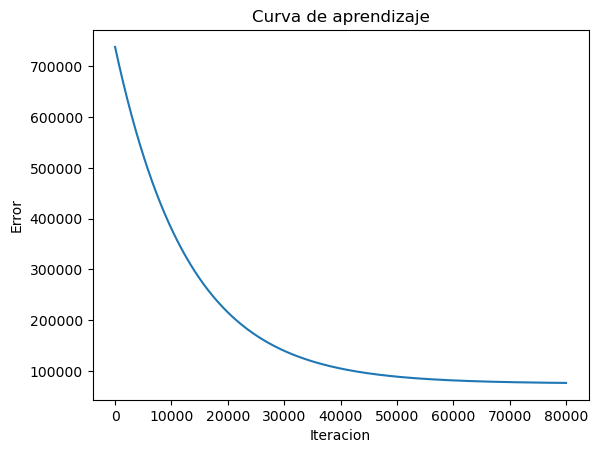

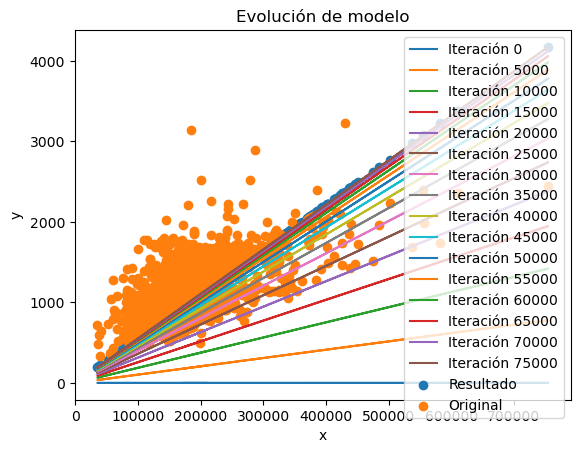

In [58]:
epochs = 80000
print_error_cada = 5000
alpha = 0.000000000000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(saleprice,firstfloorsqft,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(5000)

### 7.1.3 Overall Quality vs Sale Price

Interacion 500: 13470389172.414846
Interacion 1000: 9482625755.901102
Interacion 1500: 6811661542.875065
Interacion 2000: 5022663568.803623
Interacion 2500: 3824389262.0486693
Interacion 3000: 3021770073.410529
Interacion 3500: 2484152923.3148627
Interacion 4000: 2124028947.4528415
Interacion 4500: 1882786428.7648199
Interacion 5000: 1721168391.3539374
Interacion 5500: 1612881284.4756432
Interacion 6000: 1540314204.7153325
Interacion 6500: 1491671715.1552067
Interacion 7000: 1459053464.0156443


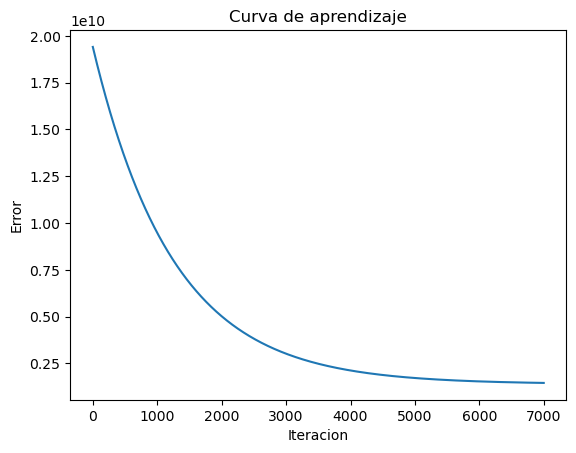

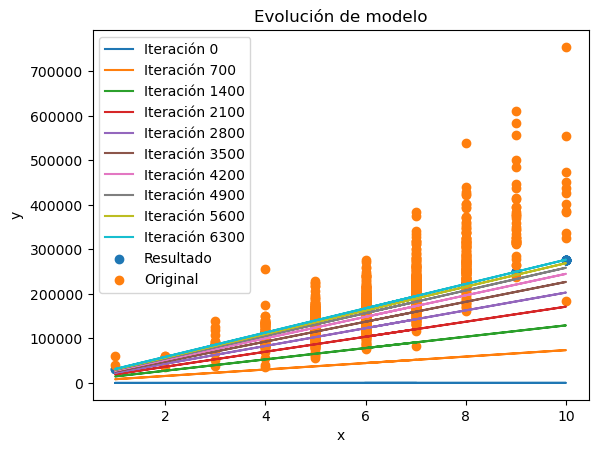

In [73]:
epochs = 7000
print_error_cada = 500
alpha = 0.00001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(overallquality,saleprice,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(700)

### 7.1.4 Overall Quality vs Year Built

Interacion 5000: 1329526.3899532922
Interacion 10000: 917983.5057797505
Interacion 15000: 642307.3111225609
Interacion 20000: 457638.5383470607
Interacion 25000: 333929.1599700961
Interacion 30000: 251052.1430890434
Interacion 35000: 195525.8222694694
Interacion 40000: 158319.79030806504
Interacion 45000: 133385.2207696189
Interacion 50000: 116670.435758759
Interacion 55000: 105461.5049041133
Interacion 60000: 97940.55959552096
Interacion 65000: 92889.93915853469
Interacion 70000: 89494.01945424054
Interacion 75000: 87206.47197659324


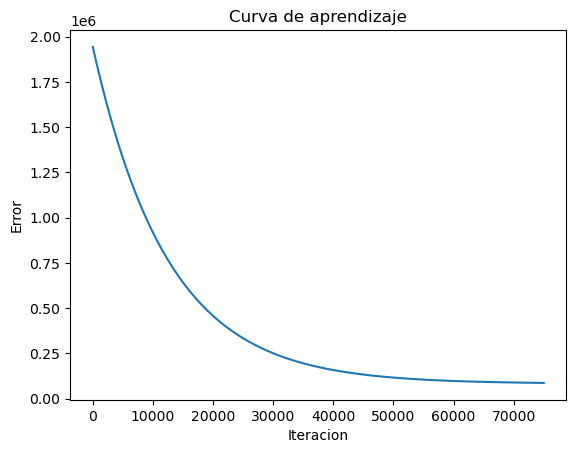

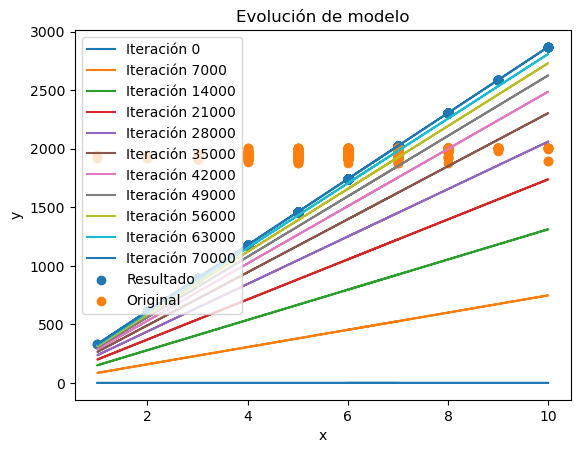

In [93]:
epochs = 75000
print_error_cada = 5000
alpha = 0.000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(overallquality,yearbuilt,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(7000)

### 7.1.5 First Floor vs Sale Price

Interacion 1000: 14953132604.304989
Interacion 2000: 11632411619.211845
Interacion 3000: 9160913144.350922
Interacion 4000: 7321461790.612161
Interacion 5000: 5952421381.59691
Interacion 6000: 4933491667.687395
Interacion 7000: 4175137308.586982
Interacion 8000: 3610720228.418845
Interacion 9000: 3190643998.0875034
Interacion 10000: 2877995700.3655686
Interacion 11000: 2645302319.8953466
Interacion 12000: 2472116635.7704215
Interacion 13000: 2343220484.372778
Interacion 14000: 2247287509.6677184
Interacion 15000: 2175887894.218403
Interacion 16000: 2122747614.6936846
Interacion 17000: 2083197131.2067256
Interacion 18000: 2053761065.7419221
Interacion 19000: 2031852813.9133477
Interacion 20000: 2015547254.9948266


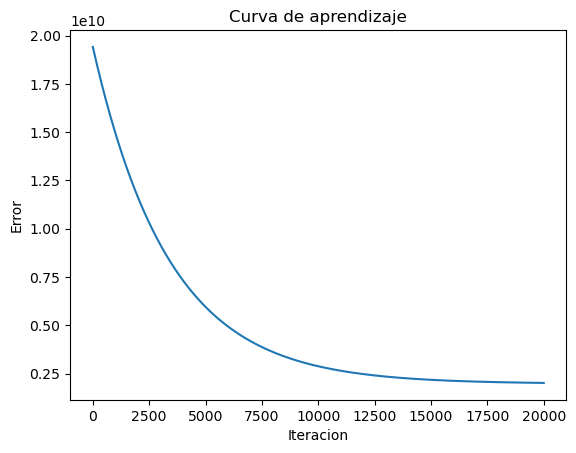

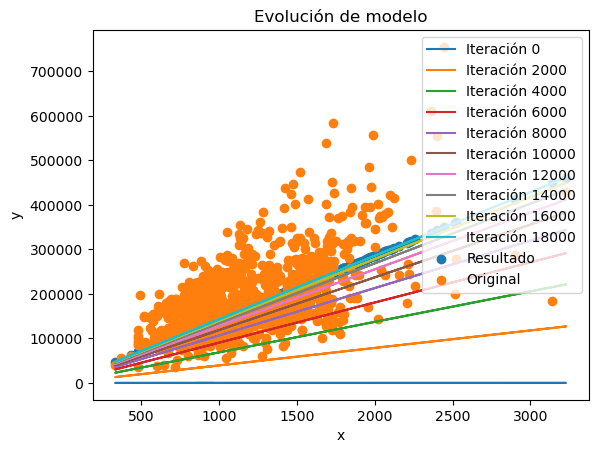

In [104]:
epochs = 20000
print_error_cada = 1000
alpha = 0.0000000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(firstfloorsqft,saleprice,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(2000)

### 7.1.6 First Floor vs Overall Quality

Interacion 1000: 14953132604.304989
Interacion 2000: 11632411619.211845
Interacion 3000: 9160913144.350922
Interacion 4000: 7321461790.612161
Interacion 5000: 5952421381.59691
Interacion 6000: 4933491667.687395
Interacion 7000: 4175137308.586982
Interacion 8000: 3610720228.418845
Interacion 9000: 3190643998.0875034
Interacion 10000: 2877995700.3655686
Interacion 11000: 2645302319.8953466
Interacion 12000: 2472116635.7704215
Interacion 13000: 2343220484.372778
Interacion 14000: 2247287509.6677184
Interacion 15000: 2175887894.218403
Interacion 16000: 2122747614.6936846
Interacion 17000: 2083197131.2067256
Interacion 18000: 2053761065.7419221
Interacion 19000: 2031852813.9133477
Interacion 20000: 2015547254.9948266


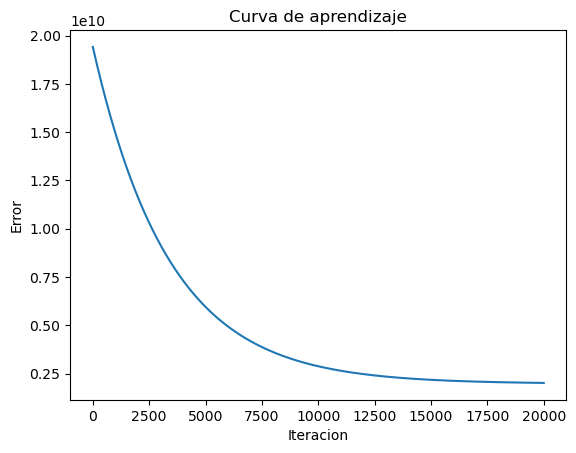

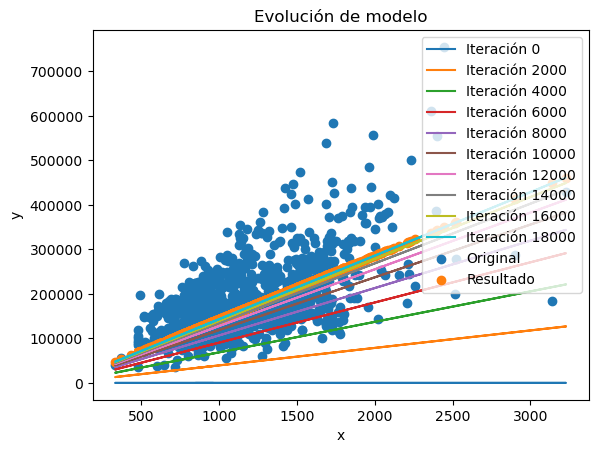

In [165]:
epochs = 20000
print_error_cada = 1000
alpha = 0.0000000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(firstfloorsqft,saleprice,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(2000)

### 7.1.7 Total Rooms vs Sale Price

Interacion 500: 13086038256.70514
Interacion 1000: 9068068308.589516
Interacion 1500: 6521468304.064694
Interacion 2000: 4907426453.6088705
Interacion 2500: 3884442422.787589
Interacion 3000: 3236072398.219529
Interacion 3500: 2825133719.66344
Interacion 4000: 2564679654.9540405
Interacion 4500: 2399603135.742351
Interacion 5000: 2294977156.64936


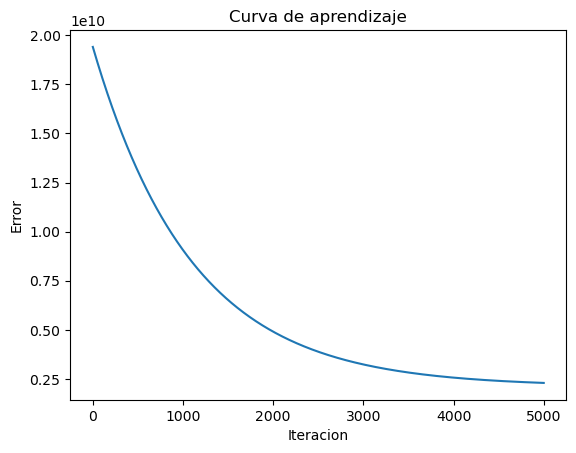

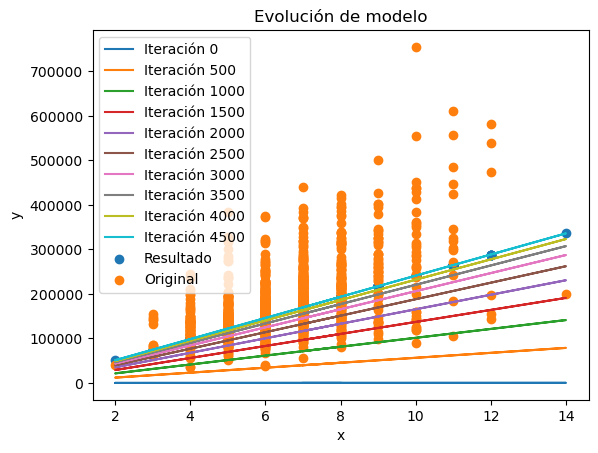

In [121]:
epochs = 5000
print_error_cada = 500
alpha = 0.00001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(totalrooms,saleprice,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(500)

### 7.1.8 Total Rooms vs Overall Quality

Interacion 50: 12.902280556511867
Interacion 100: 8.579308532581683
Interacion 150: 5.841893777670587
Interacion 200: 4.108466766283961
Interacion 250: 3.0107729656584623
Interacion 300: 2.3156306237235427
Interacion 350: 1.8753871668803077
Interacion 400: 1.596547789901475
Interacion 450: 1.419910825029359
Interacion 500: 1.3079892968369824
Interacion 550: 1.2370461489135918
Interacion 600: 1.1920508849079607
Interacion 650: 1.1634860727989915
Interacion 700: 1.145325197540924


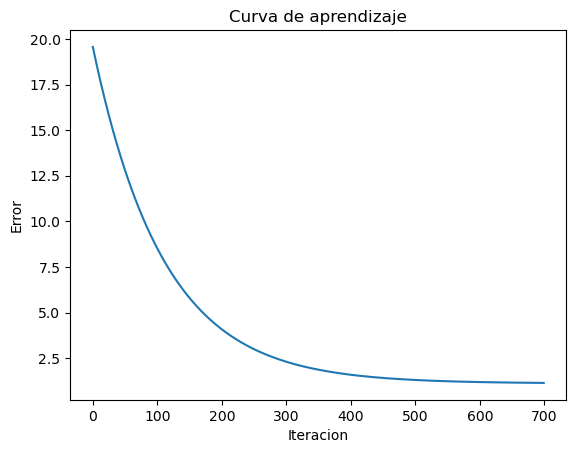

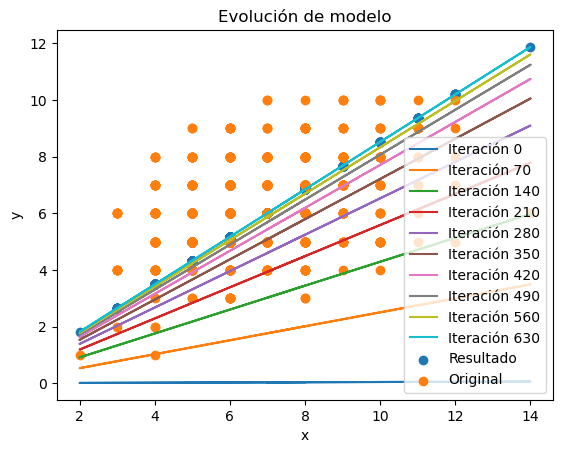

In [135]:
epochs = 700
print_error_cada = 50
alpha = 0.0001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(totalrooms,overallquality,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(70)

### 7.1.9 Year Built vs Overall Quality

Interacion 500: 13.552227801941667
Interacion 1000: 9.470047489753451
Interacion 1500: 6.702936157048499
Interacion 2000: 4.8272460742940995
Interacion 2500: 3.555807066776671
Interacion 3000: 2.693960451122453
Interacion 3500: 2.1097565809221543
Interacion 4000: 1.7137532135498272
Interacion 4500: 1.44532180634812
Interacion 5000: 1.263365221355849
Interacion 5500: 1.140025709160351
Interacion 6000: 1.0564198574162718
Interacion 6500: 0.9997475200484651
Interacion 7000: 0.9613321010822296
Interacion 7500: 0.9352921584413298
Interacion 8000: 0.9176409488226278


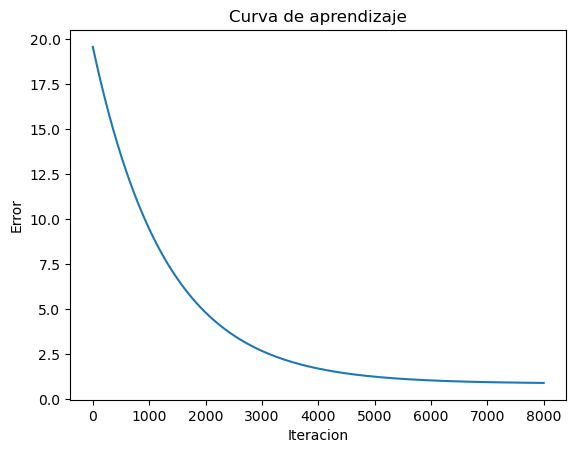

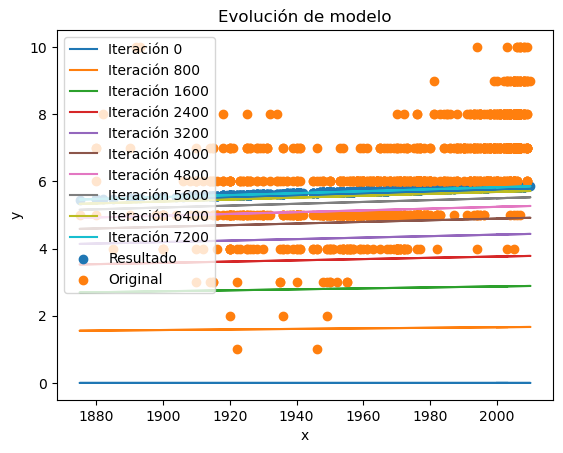

In [155]:
epochs = 8000
print_error_cada = 500
alpha = 0.0000000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(yearbuilt,overallquality,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(800)

### 7.1.10 Year Built vs Sale Price

Interacion 500: 14129261311.20175
Interacion 1000: 10541236012.48852
Interacion 1500: 8109088310.321822
Interacion 2000: 6460453768.2848
Interacion 2500: 5342924659.842566
Interacion 3000: 4585406073.172884
Interacion 3500: 4071921095.629875
Interacion 4000: 3723854623.329944
Interacion 4500: 3487917303.956045
Interacion 5000: 3327986879.4421334
Interacion 5500: 3219577829.3032637
Interacion 6000: 3146092611.040197
Interacion 6500: 3096280558.4813523
Interacion 7000: 3062515392.6574273
Interacion 7500: 3039627630.265725
Interacion 8000: 3024113130.2009764


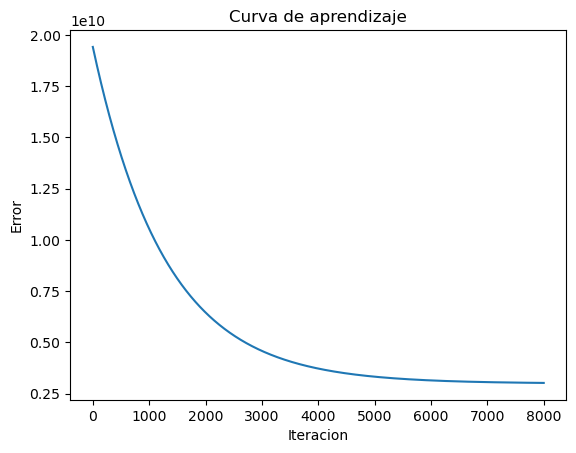

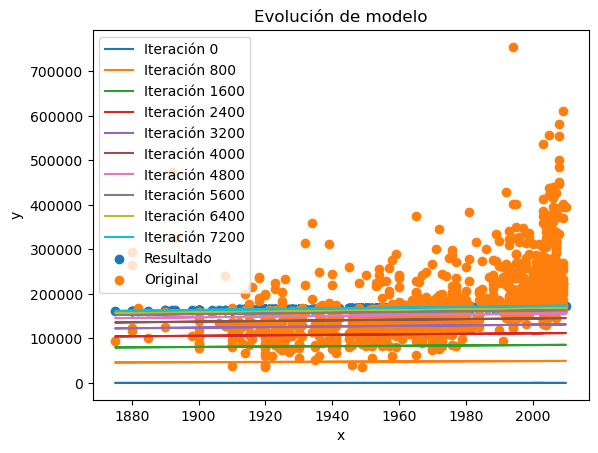

In [177]:
epochs = 8000
print_error_cada = 500
alpha = 0.0000000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(yearbuilt,saleprice,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(800)

### 7.1.11 Lot Frontage vs First Floor sq ft

Interacion 70: 390133.5485431079
Interacion 140: 225217.45078489848
Interacion 210: 148419.4444672748
Interacion 280: 112656.10779007926
Interacion 350: 96001.72008230886
Interacion 420: 88245.95234571602
Interacion 490: 84634.07748071193
Interacion 560: 82951.92297674839
Interacion 630: 82168.39707949747
Interacion 700: 81803.3428902626


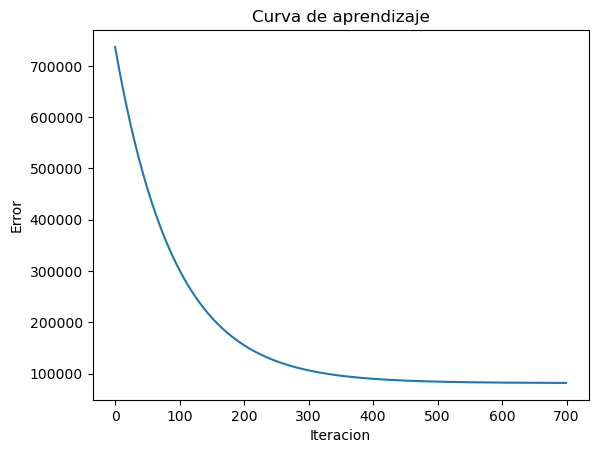

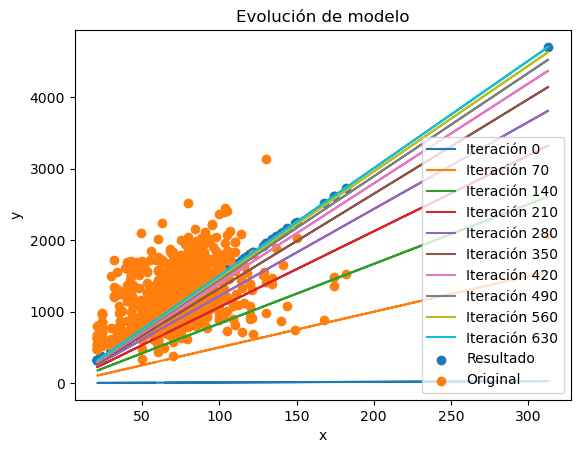

In [204]:
epochs = 700
print_error_cada = 70
alpha = 0.000001

# Quiamos NaNs de lista
lotfrontage1 = []
firstfloorsqft1 = []
for i, valor in enumerate(lotfrontage):
    if not np.isnan(valor):
        lotfrontage1.append(valor)
        firstfloorsqft1.append(firstfloorsqft[i])
        

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(lotfrontage1,firstfloorsqft1,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(70)

### 7.1.12 Lot Frontage vs Sale Price

Interacion 50: 13044559005.27214
Interacion 100: 8998817628.107176
Interacion 150: 6655037236.2982855
Interacion 200: 5297236766.422351
Interacion 250: 4510634117.667064
Interacion 300: 4054937751.68965
Interacion 350: 3790941990.8919525
Interacion 400: 3638002211.6255574
Interacion 450: 3549399376.020659
Interacion 500: 3498068214.2461157
Interacion 550: 3468329276.0299215
Interacion 600: 3451099143.3102913


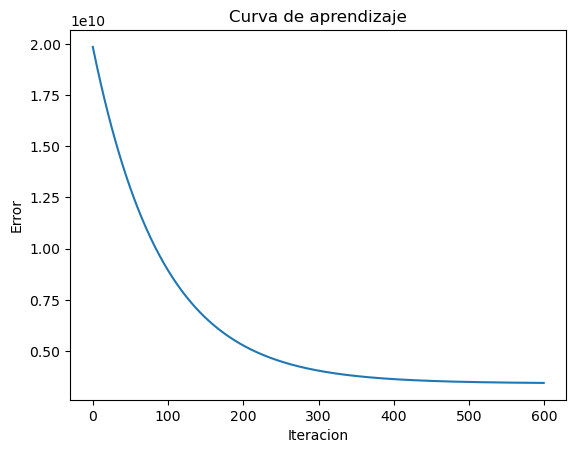

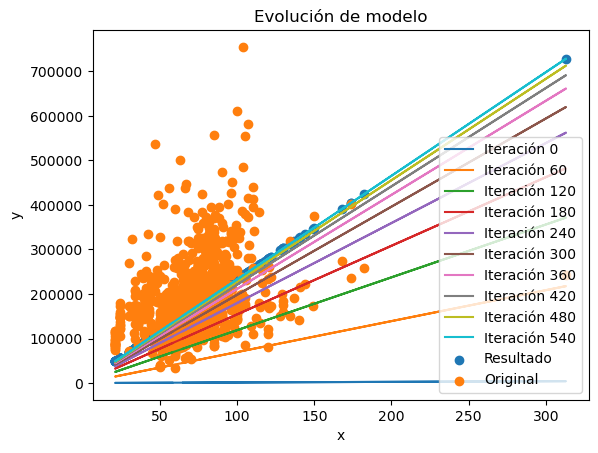

In [219]:
epochs = 600
print_error_cada = 50
alpha = 0.000001

# Quiamos NaNs de lista
lotfrontage1 = []
saleprice1 = []
for i, valor in enumerate(lotfrontage):
    if not np.isnan(valor):
        lotfrontage1.append(valor)
        saleprice1.append(saleprice[i])
        

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(lotfrontage1,saleprice1,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(60)